# ImageCollection
## Sentinel
var sentinel = ee.ImageCollection("COPERNICUS/S2")
.filterDate('2016-3-1','2016-5-31')
.filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than', 10)
.select(['B8','B4','B3','B2']).median()
var viz = {bands: ['B8', 'B4', 'B3'], max: 4000}
## Lansat 8
var lc8 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA').filterDate(START, END).median()
var viz = {bands: ['B5', 'B4', 'B3'], min: 0,  max: 0.5, gamma: [0.95, 1.1, 1]};



## CHIRPS
var chirps_orgin = ee.ImageCollection("UCSB-CHG/CHIRPS/PENTAD");

## MODIS NDVI Timeseries

# Assets
- var ce = ee.Image('users/JunXiong1981/africa_30m_extent_v201605_y2014')
- var gmia5 = ee.Image("users/JunXiong1981/gmia_v5005");
- var mali = ee.Image('users/JunXiong1981/mali_lc8_2013-14');
- var globalforest1 = ee.Image("UMD/hansen/global_forest_change_2015")
- var elev = ee.Image("USGS/SRTMGL1_003");
- var slope = ee.Terrain.slope(elev);
- 


# Fusion Tables
- grids = ee.FeatureCollection('ft:1-M2bqBc_0mEo10VmITae6hAAfd5Zs-Y_rd6YPeIJ')  // ce_grid1x1
- continent = ee.FeatureCollection('ft:1fM786Wbri6CqIz3JvyQ_vvMIBGbdUmTOGacZTnb-') // africa continent
- aezs8 = ee.FeatureCollection('ft:19hZjN8dbwPbDHNdLVaoGLEtmIbxAtrn4yDr9QVgt') // africa AEZs
- countries = ee.FeatureCollection('ft:1fGODObRcgWotUauiKV_2GlM7ZXX0sdZ5FLTJeALZ') // africa Countries
- training = ee.FeatureCollection('ft:1C_gFvQmd3AGtB0Q0XgnKk5ESUARSH79FB9Un8sF2') // GFSAD traing dataset
- reference = ee.FeatureCollection('ft:1KK298zIL_T5yHXNaKnqQ4nfK03aKJBiiQeP__EqU') // Bo's validatioin data
.filterBounds(roi.first().geometry())
.filter(ee.Filter.neq('classifications_majority_class', -1))
.filter(ee.Filter.neq('classifications_majority_class', 2))
.filter(ee.Filter.neq('classifications_majority_class', 3))
.randomColumn()

In [106]:
from pdata import *
def load_ft(name):
# - grids = ee.FeatureCollection('ft:1-M2bqBc_0mEo10VmITae6hAAfd5Zs-Y_rd6YPeIJ')  // ce_grid1x1
# - continent = ee.FeatureCollection('ft:1fM786Wbri6CqIz3JvyQ_vvMIBGbdUmTOGacZTnb-') // africa continent
# - aezs8 = ee.FeatureCollection('ft:19hZjN8dbwPbDHNdLVaoGLEtmIbxAtrn4yDr9QVgt') // africa AEZs
# - countries = ee.FeatureCollection('ft:1fGODObRcgWotUauiKV_2GlM7ZXX0sdZ5FLTJeALZ') // africa Countries
# - training = ee.FeatureCollection('ft:1C_gFvQmd3AGtB0Q0XgnKk5ESUARSH79FB9Un8sF2') // GFSAD traing dataset
# - reference = ee.FeatureCollection('ft:1KK298zIL_T5yHXNaKnqQ4nfK03aKJBiiQeP__EqU') // Bo's validatioin data
    dic = {'grid':'ft:1-M2bqBc_0mEo10VmITae6hAAfd5Zs-Y_rd6YPeIJ', 'afr':'ft:1fM786Wbri6CqIz3JvyQ_vvMIBGbdUmTOGacZTnb-','az':'ft:19hZjN8dbwPbDHNdLVaoGLEtmIbxAtrn4yDr9QVgt',
 'country':'ft:1fGODObRcgWotUauiKV_2GlM7ZXX0sdZ5FLTJeALZ','tr':'ft:1C_gFvQmd3AGtB0Q0XgnKk5ESUARSH79FB9Un8sF2','val':'ft:1KK298zIL_T5yHXNaKnqQ4nfK03aKJBiiQeP__EqU',
          'tun':'ft:1GAcqersXwiDJWzy2oCGs57EZKg52jzSxXKWErF8Q'}
    return ee.FeatureCollection(dic[name])

import json, ee; ee.Initialize()
from IPython.display import Image
grids = load_ft('tun')

# region = ee.Geometry.Polygon([[[-19.775390625, 33.358061612778876],[-15.1171875, -29.228890030194215],[61.962890625, -29.916852233070163],[53.0859375, 34.16181816123038],[18.6328125, 35.24561909420681]]]);
region = ee.Feature(grids.union().first()).bounds().geometry()
# print(region.getInfo())

image = ee.Image().toByte().paint(grids, 'fill').paint(grids, 3, 5)
region = json.dumps(region.getInfo()['coordinates'])
Image(url=image.getThumbUrl({'region':region}))


# Dataframe
# Analysis

# Hand Drawing Polygons
## africa geo zones geometry

In [ ]:
var zone1 = /* color: d63000 */ee.Geometry.Polygon(
        [[[-17.9296875, 21.043491216803552],
          [-13.88671875, 20.715015145512098],
          [-12.041015625, 21.125497636606276],
          [-11.25, 23.48340065432564],
          [-10.810546875, 25.165173368663954],
          [-7.998046875, 25.72073513441211],
          [1.0546875, 19.89072302399691],
          [3.1640625, 18.396230138028827],
          [6.50390625, 19.062117883514667],
          [12.12890625, 22.917922936146045],
          [14.23828125, 22.187404991398775],
          [16.083984375, 22.917922936146045],
          [23.291015625, 19.31114335506464],
          [25.13671875, 18.812717856407772],
          [25.83984375, 21.453068633086783],
          [35.68359375, 21.53484700204879],
          [36.298828125, 24.287026865376447],
          [34.8046875, 27.605670826465474],
          [35.68359375, 30.14512718337613],
          [33.57421875, 32.62087018318113],
          [28.916015625, 31.503629305773032],
          [22.5, 33.35806161277885],
          [19.16015625, 33.063924198120645],
          [18.544921875, 31.42866311735861],
          [13.0078125, 33.797408767572485],
          [11.77734375, 34.66935854524545],
          [11.865234375, 37.02009820136811],
          [9.228515625, 37.85750715625203],
          [-0.439453125, 36.66841891894785],
          [-4.833984375, 36.03133177633189],
          [-6.064453125, 35.96022296929667],
          [-9.31640625, 32.91648534731439],
          [-11.689453125, 28.92163128242129],
          [-16.083984375, 24.926294766395596],
          [-18.10546875, 23.32208001137843]]]),
    zone2 = /* color: 98ff00 */ee.Geometry.Polygon(
        [[[-17.75390625, 21.779905342529645],
          [-17.490234375, 18.89589255941504],
          [-18.10546875, 14.774882506516272],
          [-17.666015625, 11.78132529611229],
          [-15.46875, 11.43695521614319],
          [-10.546875, 11.26461221250444],
          [-8.4375, 9.709057068618222],
          [-4.5703125, 9.102096738726456],
          [-1.142578125, 8.58102121564184],
          [-1.669921875, 9.882275493429953],
          [2.98828125, 10.746969318460003],
          [5.009765625, 12.640338306846802],
          [11.865234375, 12.125264218331589],
          [14.150390625, 11.953349393643418],
          [13.271484375, 9.362352822055605],
          [15.380859375, 6.751896464843375],
          [20.91796875, 7.88514728342433],
          [22.5, 9.795677582829745],
          [26.455078125, 4.565473550710278],
          [33.310546875, 2.723583083348385],
          [41.484375, -2.635788574166593],
          [45.17578125, 0.7909904981540058],
          [50.44921875, 6.839169626342807],
          [52.3828125, 12.46876014482322],
          [48.8671875, 13.239945499286314],
          [44.912109375, 11.60919340793894],
          [40.078125, 17.14079039331665],
          [36.298828125, 23.725011735951796],
          [33.486328125, 22.59372606392931],
          [23.02734375, 22.431340156360605],
          [13.18359375, 24.287026865376447],
          [4.482421875, 19.80805412808859],
          [-7.998046875, 27.761329874505233],
          [-9.931640625, 27.371767300523047],
          [-15.732421875, 24.12670195868168]]]),
    zone3 = /* color: 0B4A8B */ee.Geometry.Polygon(
        [[[-16.435546875, 10.14193168613103],
          [-13.53515625, 7.188100871179019],
          [-8.61328125, 3.6888551431470478],
          [-2.8125, 3.6888551431470478],
          [3.69140625, 5.26600788280551],
          [4.306640625, 4.039617826768437],
          [8.525390625, 3.6888551431470478],
          [11.25, 5.178482088522876],
          [15.99609375, 12.21118019150401],
          [13.18359375, 14.179186142354181],
          [9.404296875, 14.093957177836236],
          [4.04296875, 14.43468021529728],
          [3.1640625, 12.983147716796566],
          [1.0546875, 11.953349393643418],
          [-3.076171875, 11.78132529611229],
          [-3.603515625, 10.83330598364249],
          [-7.294921875, 11.26461221250444],
          [-8.96484375, 12.983147716796566],
          [-13.18359375, 13.239945499286314],
          [-17.841796875, 12.726084296948184]]]),
    zone4 = /* color: ffc82d */ee.Geometry.Polygon(
        [[[13.88671875, 13.838079936422474],
          [13.53515625, 11.953349393643418],
          [11.25, 7.449624260197816],
          [9.228515625, 7.449624260197816],
          [7.822265625, 4.565473550710278],
          [8.4375, 1.4939713066293239],
          [8.26171875, -1.5818302639606328],
          [11.865234375, -6.4899833326706515],
          [12.744140625, -10.83330598364249],
          [10.986328125, -17.392579271057766],
          [12.919921875, -18.062312304546726],
          [19.599609375, -18.47960905583197],
          [24.873046875, -17.97873309555617],
          [23.291015625, -16.13026201203474],
          [22.67578125, -13.667338259654947],
          [24.521484375, -13.2399454992863],
          [24.78515625, -11.953349393643428],
          [28.65234375, -14.179186142354167],
          [30.5859375, -13.923403897723334],
          [30.498046875, -11.781325296112277],
          [29.267578125, -11.09216589350199],
          [29.443359375, -9.275622176792098],
          [31.552734375, -8.407168163601074],
          [30.234375, -5.703447982149503],
          [29.970703125, -2.0210651187669897],
          [30.849609375, 0.4394488164139768],
          [32.080078125, 2.1088986592431382],
          [30.5859375, 5.003394345022163],
          [28.740234375, 5.441022303717974],
          [24.9609375, 9.275622176792098],
          [23.642578125, 11.350796722383684],
          [21.97265625, 11.60919340793894],
          [18.984375, 9.44906182688142],
          [16.34765625, 8.320212289522956],
          [15.380859375, 9.362352822055605],
          [16.69921875, 9.795677582829745],
          [16.083984375, 11.78132529611229]]]),
    zone5 = /* color: 00ffff */ee.Geometry.Polygon(
        [[[36.38671875, 15.029685756555674],
          [35.947265625, 13.923403897723347],
          [33.486328125, 10.228437266155943],
          [32.080078125, 8.58102121564184],
          [33.046875, 7.013667927566642],
          [34.1015625, 5.528510525692801],
          [32.958984375, 4.8282597468669755],
          [30.234375, 5.003394345022163],
          [30.05859375, 2.3723687086440632],
          [27.861328125, -2.0210651187669897],
          [29.1796875, -8.146242825034385],
          [33.22265625, -10.314919285813147],
          [34.189453125, -11.867350911459306],
          [37.353515625, -12.382928338487396],
          [40.869140625, -10.919617760254686],
          [40.517578125, -9.795677582829732],
          [40.25390625, -7.885147283424318],
          [40.517578125, -4.653079918274038],
          [42.01171875, -1.5818302639606328],
          [41.748046875, -0.615222552406841],
          [42.1875, 3.074695072369682],
          [43.59375, 4.039617826768437],
          [44.912109375, 4.039617826768437],
          [48.076171875, 7.100892668623654],
          [48.427734375, 8.494104537551882],
          [46.40625, 8.58102121564184],
          [44.47265625, 9.44906182688142],
          [43.41796875, 10.83330598364249],
          [42.802734375, 12.983147716796566],
          [40.693359375, 14.859850400601049],
          [37.44140625, 15.114552871944102]]]),
    zone6 = /* color: bf04c2 */ee.Geometry.Polygon(
        [[[11.07421875, -18.47960905583197],
          [13.53515625, -21.861498734372553],
          [13.88671875, -25.641526373065755],
          [16.962890625, -31.503629305773018],
          [17.2265625, -34.23451236236984],
          [19.86328125, -35.245619094206795],
          [23.02734375, -35.02999636902566],
          [28.212890625, -33.72433966174759],
          [32.16796875, -30.14512718337612],
          [34.1015625, -26.11598592533351],
          [36.474609375, -23.96617587126503],
          [35.68359375, -20.3034175184893],
          [41.30859375, -16.383391123608387],
          [41.220703125, -10.314919285813147],
          [40.341796875, -9.88227549342994],
          [39.111328125, -10.22843726615593],
          [36.123046875, -10.746969318459989],
          [34.98046875, -9.275622176792098],
          [31.904296875, -7.71099165543323],
          [28.65234375, -7.623886853120036],
          [27.861328125, -8.407168163601074],
          [27.861328125, -11.178401873711785],
          [24.169921875, -10.141931686131018],
          [23.203125, -11.60919340793894],
          [21.533203125, -11.953349393643428],
          [21.357421875, -16.214674588248542],
          [21.005859375, -17.056784609942554],
          [12.744140625, -16.46769474828896],
          [10.986328125, -17.056784609942554]]]),
    zone7 = /* color: ff0000 */ee.Geometry.Polygon(
        [[[43.681640625, -15.876809064146757],
          [43.2421875, -17.392579271057766],
          [43.9453125, -19.642587534013032],
          [42.802734375, -21.125497636606262],
          [42.5390625, -22.512556954051437],
          [42.978515625, -24.287026865376426],
          [44.47265625, -26.037041886515826],
          [46.40625, -25.720735134412095],
          [47.63671875, -24.926294766395596],
          [51.064453125, -15.199386048559994],
          [50.009765625, -12.211180191503985],
          [48.955078125, -11.43695521614319],
          [47.8125, -12.726084296948184],
          [46.669921875, -14.689881366618764],
          [44.296875, -15.623036831528264]]]);

In [23]:
from time import gmtime, strftime
import pandas as pd
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df.meta = {'time':strftime("%Y-%m-%d %H:%M:%S", gmtime()), 'source': 'Dataset.ipynb 6.1', 'oname':'data/df_exam'}
df.to_pickle(df.meta['oname'])
df.meta
# df.shape
# for d in df.axes[0]:
#     print(d,)

{'oname': 'data/df_exam',
 'source': 'Dataset.ipynb 6.1',
 'time': '2016-08-05 00:43:40'}

In [24]:
import pandas as pd
df = pd.read_pickle('data/df_exam')
df.meta

# print(df.ct_time)

AttributeError: 'DataFrame' object has no attribute 'meta'

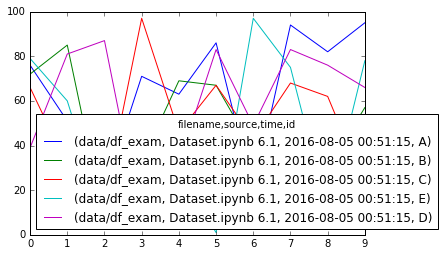

In [27]:
%matplotlib inline
from time import gmtime, strftime
import pandas as pd
col = pd.MultiIndex.from_product([['data/df_exam'], ['Dataset.ipynb 6.1'], [strftime("%Y-%m-%d %H:%M:%S", gmtime())], ['A', 'B', 'C', 'E', 'D']], names=['filename', 'source', 'time', 'id'])
df = pd.DataFrame(data=pd.np.random.randint(0,100,(10,5)), columns=col)
df.to_pickle('data/df_exam')
df1 = pd.read_pickle('data/df_exam')
df1.plot()

## HDF5 I/O functions

In [57]:
import pandas as pd
from time import localtime, strftime
def h5store(filename, df, desc):
    var = desc.split(':')[0]
    store = pd.HDFStore(filename)
    store.put(var, df)
    store.get_storer(var).attrs.metadata = desc
    store.get_storer(var).attrs.ctime = strftime("%Y-%m-%d %H:%M:%S", localtime())
    store.close()

def h5load(store, var='default'):
    data = store[var]
    metadata = store.get_storer(var).attrs.metadata
    ctime = store.get_storer(var).attrs.ctime
    return data, metadata, ctime

def h5list(filename):    
    print('File path:', filename)
    with pd.HDFStore(filename) as store:        
        for k in sorted(store.keys()):
            df, metadata, ctime = h5load(store, k)
            print(metadata, "\n\tCreated", ctime, "Dimension", df.shape, df.keys())
        
def h5csv(store, var='default'):
    df, metadata, ctime = h5load(store, var)
    csvfile = var + '.csv'
    df.to_csv(csvfile)
    print('%s ---> %s, created.' % (var, csvfile))

def h5import(filename, csvfile, desc):
    df = pd.read_csv(csvfile)
    h5store(filename, df, desc)
    
def info2df(info, fid, col, fmt="%Y%m%d", hdf=None, desc=None):
    date = [d[fid] for d in info['features']]
    value = [d['properties'][col] for d in info['features']]
    df = pd.DataFrame(value, columns=[col], index=pd.to_datetime(date, format=fmt))
    if hdf:
        h5store(hdf, df, desc)
    return df

In [13]:
%matplotlib inline
df = pd.DataFrame(data=pd.np.random.randint(0, 100, (10, 5)), columns=list('ABCED'))
meta = "chirps_test: examples of chirps dataset"
filename = 'data/hdf_exam'

# h5store(filename, df, meta)
h5import(filename, 'test.csv', 'sentinel_samples: DN Values Sentinel from random samples')
with pd.HDFStore(filename) as store:
#     h5import(store, csvfile='', desc)
    
#     df, metadata, ct = h5load(store, 'chirps_test')
#     h5csv(store, 'chirps_test')
#     df1.plot()
#     df2, metadata = h5load(store)
#     df2.plot()
#     print(metadata)
    

chirps_test: examples of chirps dataset 
	Created 2016-08-05 17:43:24 Dimension (10, 5) Index(['A', 'B', 'C', 'E', 'D'], dtype='object')
sentinel_samples: DN Sentinel from random samples 
	Created 2016-08-05 17:54:56 Dimension (268, 9) Index(['id', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8'], dtype='object')


## Read Time Series into Dataframe

In [49]:
# from pdata import *
___t = 'data/test'

import ee; ee.Initialize()
region = ee.FeatureCollection('ft:1jJcOINTBzk5DmGjwV9nfXDQG1I4lG8r5IgSklUBR');
collection = ee.ImageCollection('IDAHO_EPSCOR/GRIDMET').filterDate("2014-07-01", "2015-01-21").select(['tmmn'],['value'])
mean_values = lambda img: ee.Feature(None, img.reduceRegion('mean', region, 200))
# df = info2df(ee.FeatureCollection(collection.map(mean_values)).limit(5).getInfo(), 'id', 'value', fmt="%Y%m%d", hdf=___t, desc='gridmet: test data')
h5list(___t)


data/test
<class 'pandas.io.pytables.HDFStore'>
File path: data/test
/gridmet            frame        (shape->[5,1])
gridmet: test data 
	Created 2016-08-05 22:40:10 Dimension (5, 1) Index(['value'], dtype='object')


## Read HDF5, Plotting in Pandas

File path: data/test
gridmet: test data 
	Created 2016-08-05 22:40:10 Dimension (5, 1) Index(['value'], dtype='object')


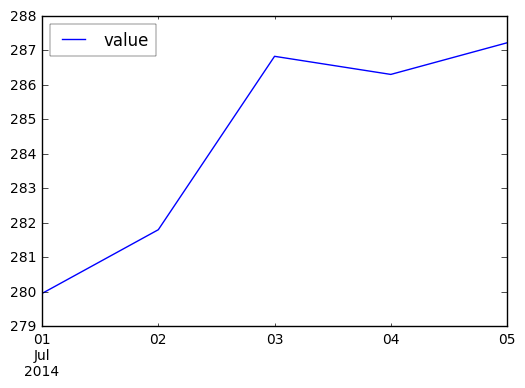

In [58]:
filename = 'data/test'
h5list(filename)
with pd.HDFStore(filename) as store:
    df, metadata, ct = h5load(store, 'gridmet')
    df.plot()

# Interactive Tables

In [5]:
import qgrid, pandas as pd
df = pd.read_csv('https://rawgit.com/suredream/datasets/master/land_area.csv')
qgrid.show_grid(df, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})

# Plotting
## Time Series

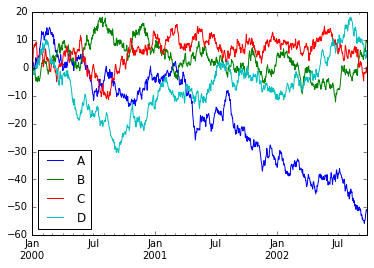

In [24]:
%matplotlib inline
import pandas as pd, numpy as np
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot()

## Andrews curves

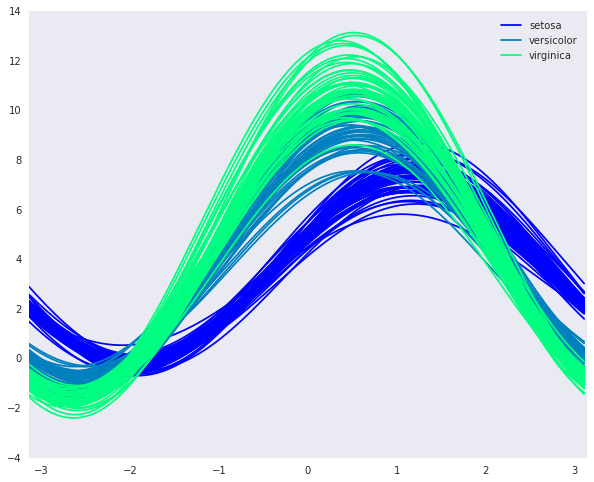

In [90]:
import seaborn as sns
data = sns.load_dataset('iris')

from pandas.tools.plotting import andrews_curves
plt.figure(figsize=(10,8))
andrews_curves(data, 'species', colormap='winter')    

## Bar Plots

<Container object of 20 artists>

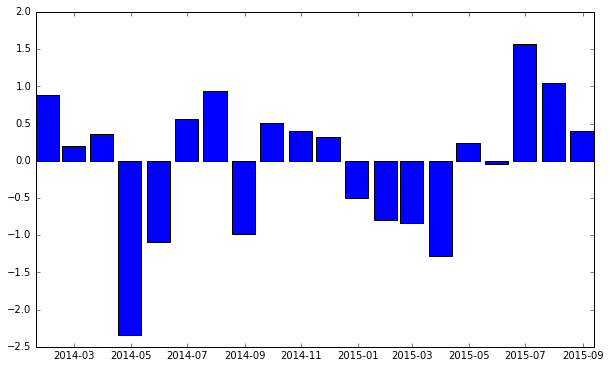

In [51]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas

N = 20
numpy.random.seed(N)

dates = pandas.date_range('1/1/2014', periods=N, freq='m')
df = pandas.DataFrame(
    data=numpy.random.randn(N), 
    index=dates,
    columns=['A']
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df.index, df['A'], width=25, align='center')

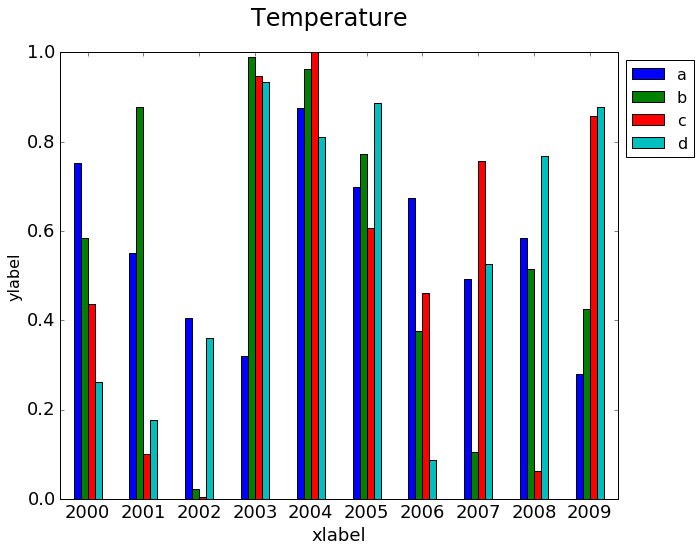

In [80]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates, datetime
df = pd.DataFrame(np.random.rand(10, 4), index=pd.date_range('1/1/2000', periods=10, freq='A'), columns=['a', 'b', 'c', 'd'])

f, ax = plt.subplots(figsize=(10,8))
df.plot(kind='bar', ax=ax, rot=0)

ax.set_xticklabels([dt.strftime('%Y') for dt in df.index])
ax.tick_params(labelsize=18) # axis tick label
plt.xlabel('xlabel', fontsize=18) # axis label
plt.ylabel('ylabel', fontsize=16)
f.suptitle('Temperature', fontsize=24) # figure title 
plt.legend(loc='upper left', prop={'size':16}, bbox_to_anchor=(1, 1)) # legend label

## Scatter

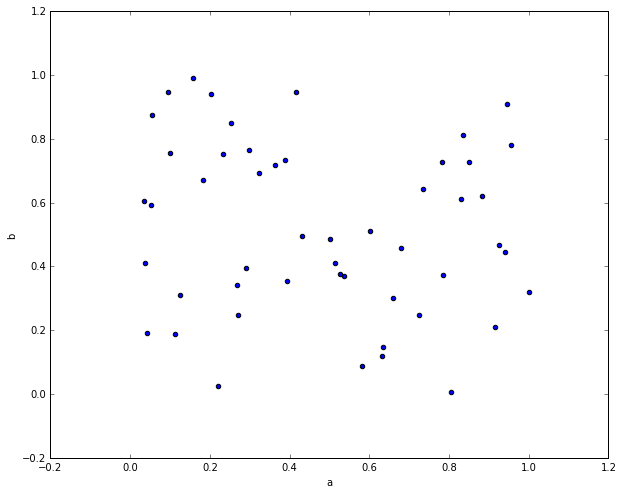

In [83]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

f, ax = plt.subplots(figsize=(10,8))
df.plot(kind='scatter', x='a', y='b', ax=ax)


## Display Rplot.pdf


In [6]:
from IPython.display import IFrame
IFrame("output/Rplots.pdf", width=700, height=750)

# GIS Maps
## zoom-in Map

## Vector

## Vector over Raster from EarthEngine

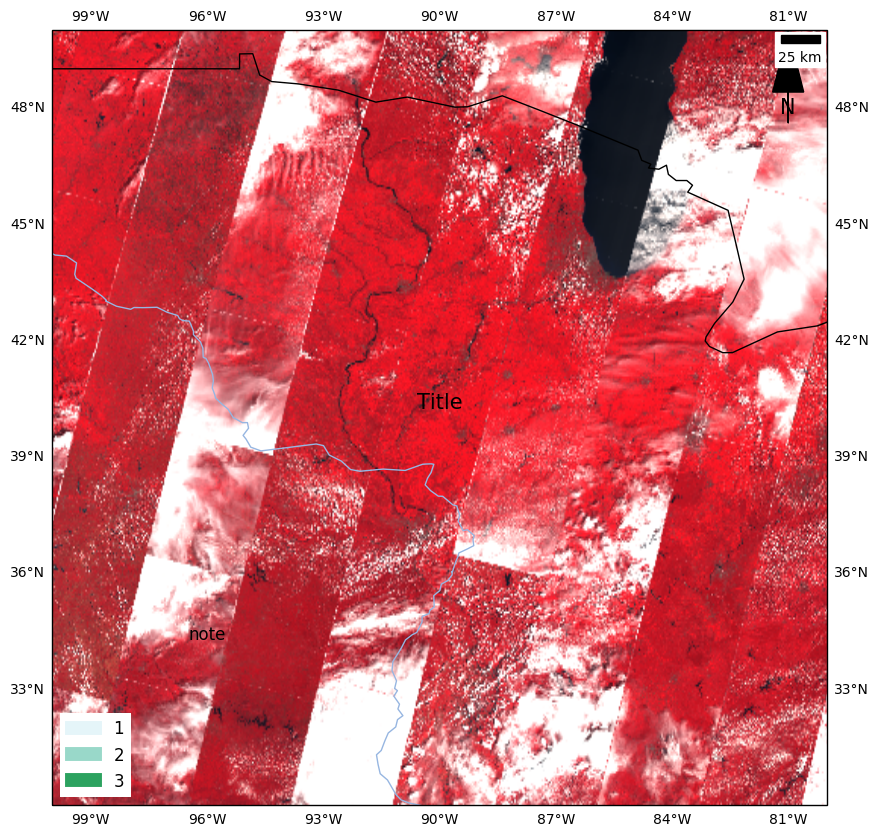

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib_scalebar.scalebar import ScaleBar

def add_note(ax, note, x=0.04, y=0.04, size=15):
    xr, yr = ax.get_xlim(), ax.get_ylim()
    xn, yn = xr[0] + (xr[1] - xr[0]) * x, yr[0] + (yr[1] - yr[0]) * (y+0.02)
    t = ax.text(xn, yn, note, ha="center", va="center", size=size, horizontalalignment='left')

def add_legend(ax, items, title='', note=''):
    for k in sorted(items.keys()):        
        plt.plot(0, 0, "-", linewidth=10, c=items[k], label=k)
    leg = plt.legend(loc='lower left')
    leg.get_frame().set_linewidth(0.0)
    if title != '':
        text = '\n'.join(title.split('\\n'))
        add_note(ax, text, x=0.5, y=0.5)
    if note != '':
        text = '\n'.join(note.split('\\n'))
        add_note(ax, text, x=0.2, y=0.2, size=12)

def add_northarrow(ax, x=0.95, y=0.88, length=0.04):
    xr, yr = plt.gca().get_xlim(), plt.gca().get_ylim()
    xs, ys = xr[0] + (xr[1] - xr[0]) * x, yr[0] + (yr[1] - yr[0]) * y
    xn, yn = xr[0] + (xr[1] - xr[0]) * x, yr[0] + (yr[1] - yr[0]) * (y+0.02)
    plt.arrow(xs, ys, 0, (yr[1] - yr[0]) * length, fc="k", ec="k", head_width=0.8, head_length=1.6)    
    # add_note(ax, "N", x=xs, y=ys, size=15)
    t = ax.text(xn, yn, 'N', ha="center", va="center", size=15)

import ee; ee.Initialize()
l8 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')
filtered = l8.filterDate('2013-05-01', '2013-08-15'); # Filter the collection down to a two week period
l8_image = filtered.mosaic() # Use the mosaic reducer, to select the most recent pixel in areas of overlap
point = ee.Geometry.Point(-90, 40) # Define a region roughly covering California
region = point.buffer(500000).bounds().getInfo()['coordinates']
# print(region)
extent = [-100, -80, 30, 50]
import urllib.request
from io import BytesIO
data = BytesIO(urllib.request.urlopen(l8_image.getThumbUrl({'region':region, 'bands': 'B5,B4,B3', 'min':0, 'max': 0.5, 'format':'png'})).read())
image = plt.imread(data)

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
im = ax.imshow(image, origin='upper', extent=extent, transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent(extent)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter, gl.yformatter, gl.xlines, gl.ylines = LONGITUDE_FORMATTER, LATITUDE_FORMATTER, False, False
ax.add_artist(ScaleBar(25000, length_fraction=0.1)) # 1 pixel = 25000 meter

items = dict(zip(['1','2','3'], ['#e5f5f9','#99d8c9','#2ca25f']))
add_northarrow(ax)
add_legend(ax, items=items, title='Title', note='note')



# Statistics
## Area Statistics


In [83]:
countries = ee.FeatureCollection('ft:1fGODObRcgWotUauiKV_2GlM7ZXX0sdZ5FLTJeALZ') # africa Countries
# print(countries.getInfo()['features'][0]['properties']['country'])
# sum_values = lambda img: ee.Feature(None, ee.Image.pixelArea().multiply(1e-10).reduceRegion('sum', region, 1000))
# filename = 'data/cropland_area_stat'
# a = ee.FeatureCollection(countries.map(sum_values)).getInfo()
# print(a)
# df = info2df(ee.FeatureCollection(countries.map(mean_values)).getInfo(), 'country', 'area', fmt="%Y%m%d", hdf=___t, desc='land_area: test data')
# print(df)
image = ee.Image.pixelArea().addBands(ee.Image.pixelArea()).select([0,1], ['b1', 'b2'])

info = image.multiply(1e-10).reduceRegions(countries, 'sum', 1000, None, None, 4).select([".*"], None, False).getInfo()
# print(info)
index = [d['properties']['country'] for d in info['features']]
b1 = [d['properties']['b1'] for d in info['features']]
# b2 = [d['properties']['b2'] for d in info['features']]
df = pd.DataFrame(b1, index=index)
df.to_csv('land_area.csv')
# df.index.name = 'country'
# print(df)



{'type': 'FeatureCollection', 'columns': {}, 'features': [{'properties': {'b2': 58.98296430129203, 'region': '7', 'cid': 317.0, 'country': 'Madagascar', 'description': '', 'b1': 58.98296430129203, 'ISO_CC': 'MG', 'name': '', 'CONTINENT': 'Africa', 'Land_Type': 'Primary land'}, 'type': 'Feature', 'geometry': None, 'id': '2'}, {'properties': {'b2': 0.04303527181249999, 'region': '7', 'cid': 452.0, 'country': 'Saint Helena', 'description': '', 'b1': 0.04303527181249999, 'ISO_CC': 'SH', 'name': '', 'CONTINENT': 'Africa', 'Land_Type': 'Small island'}, 'type': 'Feature', 'geometry': None, 'id': '3'}, {'properties': {'b2': 9.584014846468726, 'region': '3', 'cid': 307.0, 'country': 'Liberia', 'description': '', 'b1': 9.584014846468726, 'ISO_CC': 'LR', 'name': '', 'CONTINENT': 'Africa', 'Land_Type': 'Primary land'}, 'type': 'Feature', 'geometry': None, 'id': '4'}, {'properties': {'b2': 186.88266225132074, 'region': '2', 'cid': 595.0, 'country': 'Sudan', 'description': '', 'b1': 186.882662251320

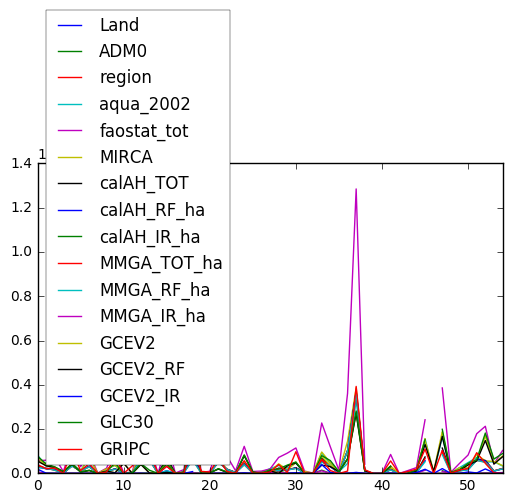

In [85]:
df = pd.read_csv('data/land_area.csv')
df.plot()